A notebook to draw some plots; you may need to create folders (or add mkdir command which I was too lazy to do)

In [1]:
import pickle
import re
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter, defaultdict
from scipy.interpolate import make_interp_spline, BSpline

In [5]:
import nltk
from nltk.corpus import stopwords

In [8]:
russian_stopwords = set(stopwords.words("russian"))

In [2]:
data = pickle.load(open('bigresult.bin', 'rb'))

In [3]:
yeardata = defaultdict(Counter)

for key, value in data.items():
    yeardata[value[1]] += value[0]

In [4]:
yearwordcounts = dict()
for key, value in yeardata.items():
    yearwordcounts[key] = sum(value.values())

In [5]:
all = sorted(yearwordcounts.items())
x = [el[0] for el in all]
# summ = sum(x[1] for x in all)
y = [el[1] for el in all]
del all

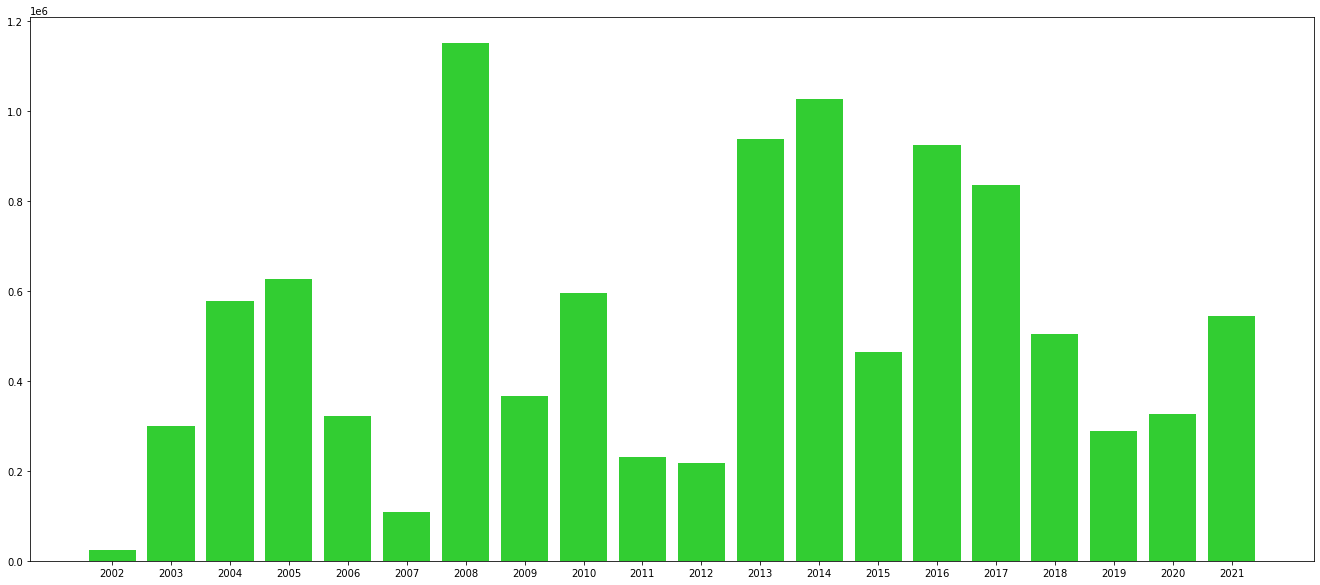

In [6]:
plt.figure(figsize=(23, 10))
ax1 = plt.subplot()
ax1.set_xticks(x)
ax1.set_xticklabels(x)
ax1 = plt.bar(x, y, color='limegreen')
plt.savefig('yearcounts_unbalanced.png', bbox_inches='tight')
plt.show()

In [48]:
with open('by_year_dicts.txt', 'w', encoding='utf8') as file:
    for key, value in sorted(yeardata.items()):
        print(key, file=file)
        longest = max(len(x[0]) for x in value.keys())
        c = 1
        for k, v in sorted(value.items(), key=lambda x: (-x[1], x[0])):
            if k[1] != 'PUNCT':
                print(f'{c:>6}. {k[0]:<{longest}} {k[1]:<6} {v:>6}', file=file)
                c += 1
        print(file=file)

In [49]:
with open('by_year_dicts_most_freq.txt', 'w', encoding='utf8') as file:
    for key, value in sorted(yeardata.items()):
        print(key, file=file)
        longest = max(len(x[0]) for x in value.keys())
        c = 1
        for k, v in sorted(value.items(), key=lambda x: (-x[1], x[0]))[:100]:
            if k[1] != 'PUNCT':
                print(f'{c:>3}. {k[0]:<{longest}} {k[1]:<6} {v:>6}', file=file)
                c += 1
        print(file=file)

In [5]:
puncts = {}
for key, value in yeardata.items():
    d = {}
    for k, v in value.items():
        if k[1] == 'PUNCT':
            kre = re.sub(r'!{3,}', '!!!!', k[0])
            kre = re.sub(r'\?{3,}', '????', kre)
            d[kre] = v
    puncts[key] = d

In [158]:
all = sorted(puncts.items())

In [ ]:
for k, v in all:
    print(k)
    lst = sorted(v.items())
    s = sum(e[1] for e in lst)
    x = [e[0] for e in lst]
    y = [e[1]/s * 100 for e in lst]
    plt.figure(figsize=(30, 15))
    plt.tick_params(axis='both', which='major', labelsize=20)
    plt.bar(x, y, color='darkslategray')
    plt.savefig(f'yearpuncts/{k}.png', bbox_inches='tight')
    plt.show()

In [ ]:
print(puncts)

In [6]:
for k in puncts:
    for p in puncts[k]:
        puncts[k][p] = puncts[k][p] / yearwordcounts[k] * 1e6

In [7]:
punctrev = defaultdict(dict)
for key, value in puncts.items():
    for k, v in value.items():
        if k == '(':
            k = ')'
        if k == '-' or k == '–':
            k = '—'
        if k == '«' or k == '"':
            k = '»'
        if k in {',', '.', '—', '...', '!', '?', ':', ')', ';', '?!', '?!!', '!..', '?..', '?!..', '»'}:
            if key in punctrev[k]:
                punctrev[k][key] += v
            else:
                punctrev[k][key] = v

In [ ]:
punctrev.keys()
names = {}
for k in punctrev.keys():
    names[k] = input(f'{k} > ')
names

In [ ]:
def unctname(pun):
    names = {',': 'запятая',
    '.': 'точка',
    '—': 'm dash',
    '...': 'многоточие',
    '!': 'восклицательный знак',
    '?': 'вопросительный знак',
    ':': 'двоеточие',
    ')': 'скобки',
    ';': 'точка с запятой',
    '?!': 'вопросительный и восклицательный знак',
    '»': 'кавычки',
    '?!!': 'вопросительный и два восклицательных знака',
    '!..': 'восклицательный знак и две точки',
    '?..': 'вопросительный знак и две точки',
    '?!..': 'вопросительный, восклицательный знак и две точки'}
    return names[pun]
    

for k, v in punctrev.items():
    print(k)
    lst = sorted(v.items())
    x = [e[0] for e in lst]
    y = [e[1] for e in lst]
    plt.figure(figsize=(30, 15))
    plt.tick_params(axis='both', which='major', labelsize=20)
    plt.title(k)
    ax1 = plt.subplot()
    ax1.set_xticks(x)
    ax1.set_xticklabels(x)
    xnew = np.linspace(min(x), max(x), 300)  
    spl = make_interp_spline(x, y, k=3)  # type: BSpline
    power_smooth = spl(xnew)
    ax1 = plt.plot(xnew, power_smooth, color='steelblue')
    plt.savefig(f'puncts/{unctname(k)}.png', bbox_inches='tight')
    plt.show()

In [ ]:
plt.figure(figsize=(40, 30))
plt.tick_params(axis='both', which='major', labelsize=20)
colors = ['maroon', 'tomato', 'sandybrown', 'gold', 'darkkhaki', 
'greenyellow', 'palegreen', 'seagreen', 'darkslategray', 'steelblue', 
'midnightblue', 'slateblue', 'blueviolet', 'plum', 'palevioletred']
for item, color in zip(punctrev.items(), colors):
    lst = sorted(item[1].items())
    x = [e[0] for e in lst]
    y = [e[1] for e in lst]
    xnew = np.linspace(min(x), max(x), 300)  
    spl = make_interp_spline(x, y, k=3)  # type: BSpline
    power_smooth = spl(xnew)
    plt.plot(xnew, power_smooth, color=color, label=item[0])
plt.legend(prop={'size': 16})
plt.show()


In [171]:
various = {}
for key, value in yeardata.items():
    d = {}
    for k, v in value.items():
        if k[0] in {'мужчина', 'женщина', 'девушка', 'парень', 'девочка', 'мальчик', 'муж', 'жена'}:
            d[k[0]] = v / yearwordcounts[key] * 1e6
    various[key] = d

In [172]:
variousrev = defaultdict(dict)
for key, value in various.items():
    for k, v in value.items():
        variousrev[k][key] = v

In [ ]:
plt.figure(figsize=(40, 30))
plt.tick_params(axis='both', which='major', labelsize=20)
colors = ['maroon', 'tomato', 'sandybrown', 'gold', 'darkkhaki', 
'greenyellow', 'palegreen', 'seagreen', 'darkslategray', 'steelblue', 
'midnightblue', 'slateblue', 'blueviolet', 'plum', 'palevioletred']
for item, color in zip(variousrev.items(), colors):
    lst = sorted(item[1].items())
    x = [e[0] for e in lst]
    y = [e[1] for e in lst]
    xnew = np.linspace(min(x), max(x), 300)  
    spl = make_interp_spline(x, y, k=3)  # type: BSpline
    power_smooth = spl(xnew)
    plt.plot(xnew, power_smooth, color=color, label=item[0])
plt.legend(prop={'size': 16})
plt.show()